In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
my_data=pd.read_csv('my_movies.csv')
my_data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movies_data=my_data.copy()

In [5]:
movies_data.drop(['V1','V2','V3','V4','V5'], axis=1,inplace=True)
movies_data.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
frequent_itemset=apriori(movies_data,min_support=0.01,use_colnames=True)
frequent_itemset['length']=frequent_itemset['itemsets'].apply(lambda x: len(x))

In [7]:
frequent_itemset.head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [8]:
rules_movies=association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules_movies.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


In [9]:
rules_movies[(rules_movies['lift']>1) & (rules_movies['confidence']>=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
6,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
9,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
10,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
13,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
226,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
228,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
229,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
230,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [12]:
# rules_movies

Text(0, 0.5, 'confidence')

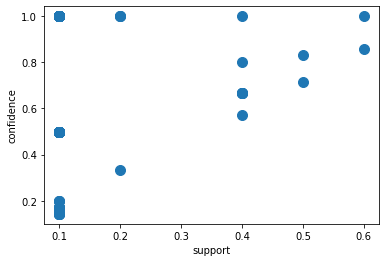

In [14]:
plt.scatter(rules_movies['support'],rules_movies['confidence'],s =100,marker='o')
plt.xlabel("support")
plt.ylabel("confidence")